## Upscaling 


# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# RGBA to PNG

In [2]:
def adapt_image(the_img):
    return np.uint8(np.clip(the_img.round(),0,255)) 

def adapt_PNG(the_PNG):
    the_PNG = the_PNG[:,:,:3]      
    the_PNG = the_PNG * 255        
    the_PNG = adapt_image(the_PNG)
    return the_PNG

# Upscale by 2

In [3]:
def upscale_by_2(pic):
    """
    This function upscales an incoming picture by a linear factor of 2.
    This yields a picture that's 4 times larger (in area) than the original.
    """
    rows, cols, temp = np.shape(pic)
    last_row = pic[rows-1]
    pic = np.insert(pic, -1, last_row, axis=0)
    last_col = pic[:,cols-1]
    pic = np.insert(pic, -1, last_col, axis=1)+0.0
    larger = np.zeros((rows*2,cols*2,3),np.float64)
    for i in range(rows):
        il = i * 2
        for j in range(cols):
            jl = j * 2
            larger[il,jl] = pic[i,j]  # top-left pixel
            
            # top-right pixel:
            larger[il,jl+1,0] = (pic[i,j,0]+pic[i,j+1,0])/2  #    Red Channel
            larger[il,jl+1,1] = (pic[i,j,1]+pic[i,j+1,1])/2  # Green Channel
            larger[il,jl+1,2] = (pic[i,j,2]+pic[i,j+1,2])/2  # Blue Channel
            
            # bottom-left pixel:
            larger[il+1,jl,0] = (pic[i,j,0]+pic[i+1,j,0])/2  #    Red Channel
            larger[il+1,jl,1] = (pic[i,j,1]+pic[i+1,j,1])/2  # Green Channel
            larger[il+1,jl,2] = (pic[i,j,2]+pic[i+1,j,2])/2  # Blue Channel
            
            # bottom-right pixel:
            larger[il+1,jl+1,0] = (pic[i,j,0]+pic[i+1,j+1,0])/2  #    Red Channel
            larger[il+1,jl+1,1] = (pic[i,j,1]+pic[i+1,j+1,1])/2  # Green Channel
            larger[il+1,jl+1,2] = (pic[i,j,2]+pic[i+1,j+1,2])/2  # Blue Channel

    return larger

# Plot Downscaled (x4)

(97, 134, 3)

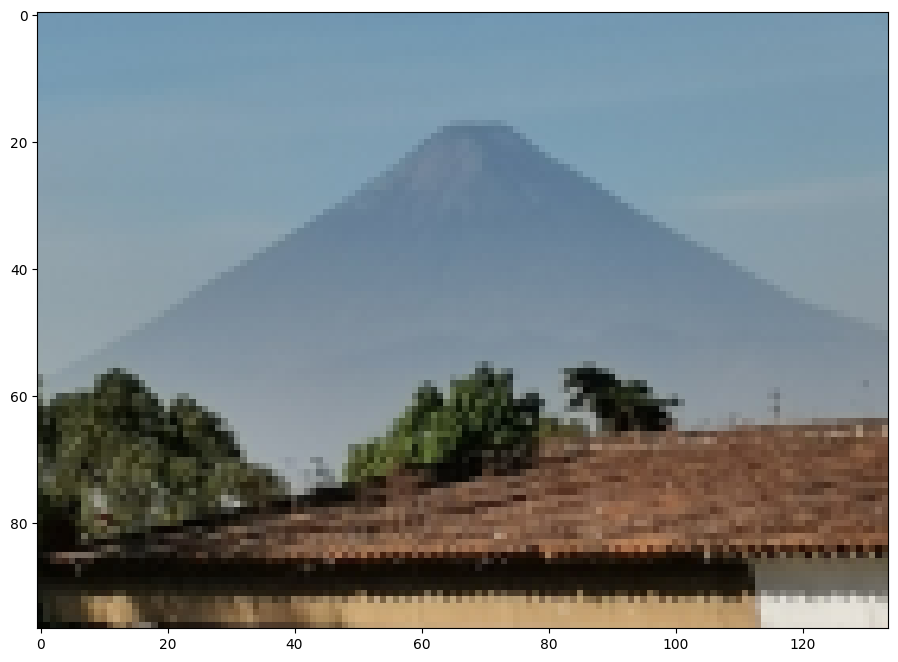

In [5]:
rcParams['figure.figsize'] = (20,8)

img = plt.imread('images/smaller.bmp')
plt.imshow(img)
np.shape(img)

# Plot Upscaled (x2) (ie Downscaled (x2))

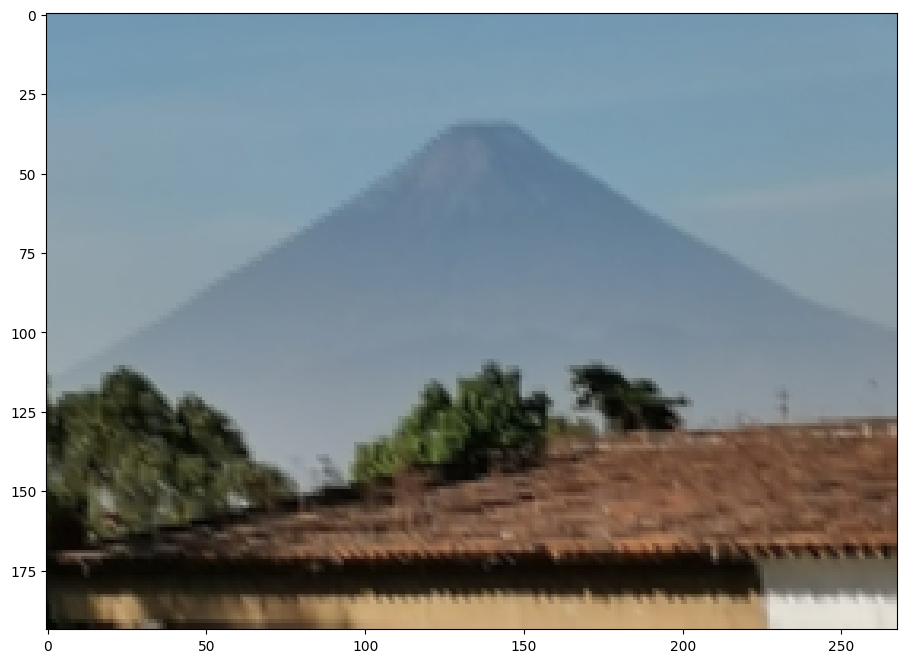

In [6]:
# Let's increase the resolution by a linear factor of 2 (4 times larger in area)
# The upscale_by_2() function is defined in EC_CV.py

img_l = upscale_by_2(img)
img_l = adapt_image(img_l)
plt.imshow(img_l)

# Plot Downscaled (x4) vs Upscaled (x2) (ie Downscaled (x2))

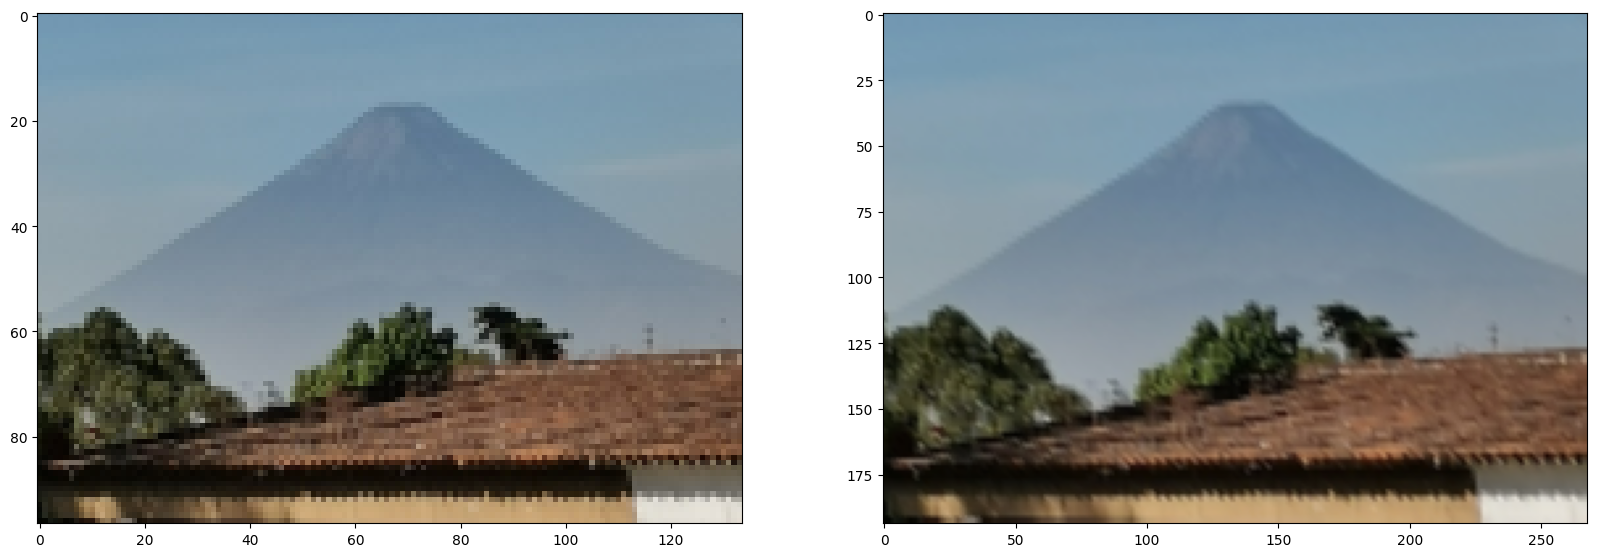

In [7]:
# Let's see the two images side by side

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_l)

# Plot Downscaled (x4) vs Upscaled (x4) (ie 'Normal')

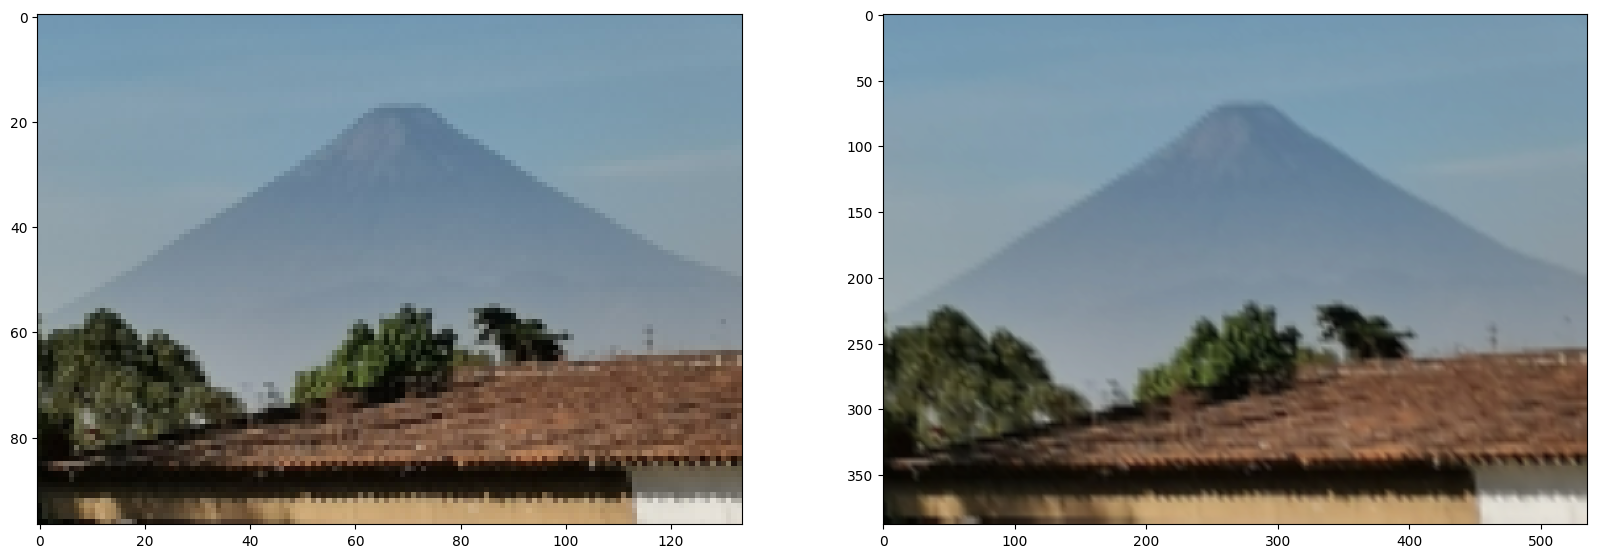

In [8]:
# Let's perform a second enlargement 

img_l = upscale_by_2(img_l)
img_l = adapt_image(img_l)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_l)

# Save Image

In [11]:
# Let's save the larger image into a file

plt.imsave("images/larger.bmp",img_l)